**NOTES:**

Important Libraries used in ML:

*   **pandas** is used for working with data; once data is converted to a pandas dataframe, its manipulation process is greatly simplified
*   **numpy** is used for numerical operations on large datasets

ML Pipeline:
*   Inputting data
*   Data preprocessing
*   Data training
*   Data testing

USEFUL LINKS:

*   pandas library tutorial: https://www.w3schools.com/python/pandas/default.asp

*   reading a csv file using pandas: https://www.w3schools.com/python/pandas/pandas_csv.asp

*   k-nearest neighbors library documentation: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


In [29]:
# import libraries 
import numpy as np
import pandas as pd

**Inputting Data**

In [30]:
# INPUTTING DATA: reading in the dataset
# url contains the iris.csv file stored in the ACM-W github

# load CSV into a pandas DataFrame
url = 'https://raw.githubusercontent.com/scuacmw/Intro-to-Machine-Learning-Spring-2023/main/iris.csv'
dataset = pd.read_csv(url)

# print out the dimensions of the dataset: format will display as "(rows, columns)"
print("Dataset dimensions:", dataset.shape)

# print out the first five entries of the dataset
dataset.head(5)

Dataset dimensions: (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Data Preprocessing**

In [31]:
# DATA PREPROCESSING: preparing the dataset to apply to the existing knn library
# Split the dataset into X (features) and y (labels)
# features represent the dimensions of each data entry (EX: the features for data entry 0 is [5.1, 3.5, 1.4, 0.2])
# labels represent the species assigned to each data entry (EX: the label for data entry 0 is "setosa")
feature_columns = ['sepal_length', 'sepal_width', 'petal_length','petal_width']
X = dataset[feature_columns].values
y = dataset['species'].values

**Notes on the KNeighborsClassifier:**

Currently our labels store three types of string values: "setosa", "virginica", and "versicolor"

The KNeighborsClassifier library does NOT accept string labels: we will need to use LabelEncoder to transform these strings to numbers:

*   Iris-setosa --> 0
*   Iris-versicolor --> 1
*   Iris-virginica --> 2

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

**Data Training and Testing**

In [37]:
# DATA TRAINING: splitting the dataset for training and testing
# We will be using an 80:20 ratio: 80% of our data set will be used to train the model and the remaining 20% will be used to test the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Calculate the accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.97


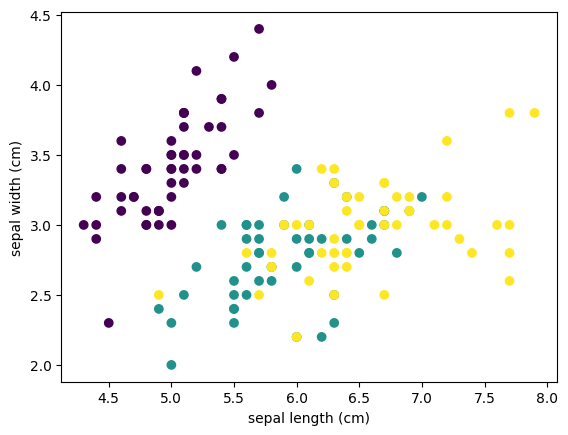

In [38]:
# Visualization: three colors each representing one of the three iris classes; each point is classified to a flower species
import matplotlib.pyplot as plt

# Create a scatter plot of the first two features
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

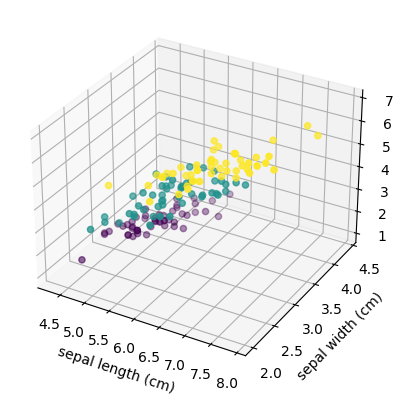

In [40]:
# Create a 3D scatter plot of the first three features
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
ax.set_zlabel('petal length (cm)')
plt.show()